# Subamostragem - Tomek Links

In [1]:
import pandas as pd
import random
import numpy as np

dataset = pd.read_csv("..\\DATABASES\\credit_data.csv")
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [2]:
dataset.dropna(inplace=True)

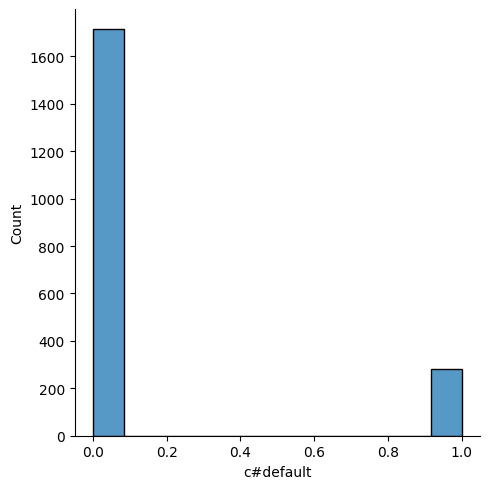

In [3]:
import seaborn as sns
sns.displot(dataset["c#default"])

In [4]:
X = dataset.iloc[:, 1:4].values
X.shape

(1997, 3)

In [5]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [6]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
modelo = GaussianNB()

modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [9]:
previsoes = modelo.predict(X_teste)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.9275

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(previsoes, y_teste)

<AxesSubplot: >

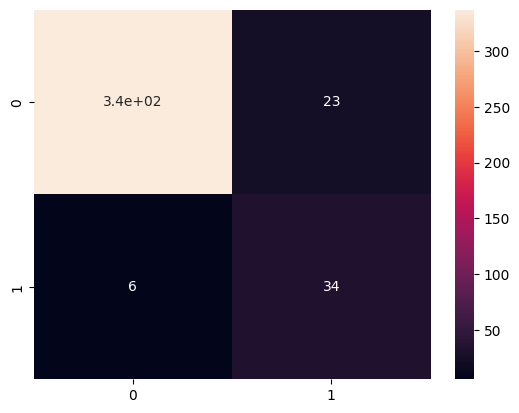

In [12]:
sns.heatmap(cm, annot=True)

In [28]:
from imblearn.under_sampling import TomekLinks

In [29]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [30]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [31]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [32]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [34]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [35]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9184210526315789

In [38]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[319,  27],
       [  4,  30]], dtype=int64)